This page contains the Naive Bayes code and visualizations done in Python for Text data. I have taken hashtags of fashiontrends and ecommerce to check discussions around the topics and done Naive Bayes Classification on the data. 

In [19]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.utils import resample

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from wordcloud import WordCloud, STOPWORDS


In [20]:
df1 = pd.read_csv(Clean_Twitter_data.csv)
df2 = pd.read_csv(Clean_Twitter_data1.csv)

In [21]:
# Merge datasets

df = pd.concat([df1, df2], ignore_index=True)
df

label                                               text  \
0    fashiontrends  What's the outfit tonight? 😏\n⁠\nStreaming Eve...   
1    fashiontrends  FESTIVE FEATHERS - #fashion #fashionable #fash...   
2    fashiontrends  Our classic cloud slides are the comfiest shoe...   
3    fashiontrends  Trendiest Knitwear At Net-A-Porter #fashiontre...   
4    fashiontrends  Or like #Celio, a cool, fun-loving and smart o...   
..             ...                                                ...   
197      ecommerce  ChocoMars - Multi-Purpose WordPress Theme\n\n\...   
198      ecommerce   is for Sale!\n#domain #domainname #domainname...   
199      ecommerce  WooCommerce Membership *\n\n\n#codecanyon #eco...   
200      ecommerce  How to Create an Omnichannel Fraud Prevention ...   
201      ecommerce  Digita - WooCommerce Parallax Theme\n\n\n#comp...   

                                            clean_text  \
0    Whats the outfit tonight \n\nStreaming Everywh...   
1    FESTIVE FEATHERS  fashion fashionable fashiona...   
2    Our classic cloud slides are the comfiest shoe...   
3    Trendiest Knitwear At NetAPorter fashiontrends...   
4    Or like Celio a cool funloving and smart one\n...   
..                                                 ...   
197  ChocoMars  MultiPurpose WordPress Theme\n\n\nb...   
198   is for Sale\ndomain domainname domainnamefors...   
199  WooCommerce Membership \n\n\ncodecanyon ecomme...   
200  How to Create an Omnichannel Fraud Prevention ...   
201  Digita  WooCommerce Parallax Theme\n\n\ncomput...   

                                       Tweet_tokenized  \
0    ['whats', 'the', 'outfit', 'tonight', 'streami...   
1    ['festive', 'feathers', 'fashion', 'fashionabl...   
2    ['our', 'classic', 'cloud', 'slides', 'are', '...   
3    ['trendiest', 'knitwear', 'at', 'netaporter', ...   
4    ['or', 'like', 'celio', 'a', 'cool', 'funlovin...   
..                                                 ...   
197  ['chocomars', 'multipurpose', 'wordpress', 'th...   
198  ['', 'is', 'for', 'sale', 'domain', 'domainnam...   
199  ['woocommerce', 'membership', 'codecanyon', 'e...   
200  ['how', 'to', 'create', 'an', 'omnichannel', '...   
201  ['digita', 'woocommerce', 'parallax', 'theme',...   

                                    Tweet_without_stop  \
0    ['whats', 'outfit', 'tonight', 'streaming', 'e...   
1    ['festive', 'feathers', 'fashion', 'fashionabl...   
2    ['classic', 'cloud', 'slides', 'comfiest', 'sh...   
3    ['trendiest', 'knitwear', 'netaporter', 'fashi...   
4    ['like', 'celio', 'cool', 'funloving', 'smart'...   
..                                                 ...   
197  ['chocomars', 'multipurpose', 'wordpress', 'th...   
198  ['', 'sale', 'domain', 'domainname', 'domainna...   
199  ['woocommerce', 'membership', 'codecanyon', 'e...   
200  ['create', 'omnichannel', 'fraud', 'prevention...   
201  ['digita', 'woocommerce', 'parallax', 'theme',...   

                                         Tweet_stemmed  \
0    ['what', 'outfit', 'tonight', 'stream', 'every...   
1    ['festiv', 'feather', 'fashion', 'fashion', 'f...   
2    ['classic', 'cloud', 'slide', 'comfiest', 'sho...   
3    ['trendiest', 'knitwear', 'netaport', 'fashion...   
4    ['like', 'celio', 'cool', 'funlov', 'smart', '...   
..                                                 ...   
197  ['chocomar', 'multipurpos', 'wordpress', 'them...   
198  ['', 'sale', 'domain', 'domainnam', 'domainnam...   
199  ['woocommerc', 'membership', 'codecanyon', 'ec...   
200  ['creat', 'omnichannel', 'fraud', 'prevent', '...   
201  ['digita', 'woocommerc', 'parallax', 'theme', ...   

                                      Tweet_lemmatized  
0    ['whats', 'outfit', 'tonight', 'streaming', 'e...  
1    ['festive', 'feather', 'fashion', 'fashionable...  
2    ['classic', 'cloud', 'slide', 'comfiest', 'sho...  
3    ['trendiest', 'knitwear', 'netaporter', 'fashi...  
4    ['like', 'celio', 'cool', 'funloving', 'smart'...  
..    

In [22]:
df = df[[label,Tweet_lemmatized]]
df.head()

label                                   Tweet_lemmatized
0  fashiontrends  ['whats', 'outfit', 'tonight', 'streaming', 'e...
1  fashiontrends  ['festive', 'feather', 'fashion', 'fashionable...
2  fashiontrends  ['classic', 'cloud', 'slide', 'comfiest', 'sho...
3  fashiontrends  ['trendiest', 'knitwear', 'netaporter', 'fashi...
4  fashiontrends  ['like', 'celio', 'cool', 'funloving', 'smart'...

In [23]:
final_tweets=[i.replace(",","").replace("[","").replace("]","").replace("","") for i in df[Tweet_lemmatized]]
final_tweets[0:5]

['whats outfit tonight streaming everywhere link bio saturday weekend sexpositive weekendmood deephouse techhouse spotify theeveningafter lifestyle fashiontrends styleblogger fashioninspo fashion style model painting makeup fashionblogger ',
 'festive feather fashion fashionable fashionaddict fashionblogger fashionbloggers fashiongram fashionicon fashioninspo fashionista fashionistas fashionlove fashionlovers fashionpost fashionstyle fashiontrends feather festive insta ',
 'classic cloud slide comfiest shoe around shop kat cloud slide today yoru fave color minimal heel fashionrevolution black fashiontrends summerfashion fashioninspo vintagefashion glamour cloudshoes slipper ',
 'trendiest knitwear netaporter fashiontrends via youtube knitwear sweater netaporter fashiontrends',
 'like celio cool funloving smart one trendy fashiontrends lookatme ']

In [24]:
df[final_tweets]=final_tweets

/var/folders/q0/hps99sh511n627gdy32s4wlh0000gn/T/ipykernel_52383/3791901592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['final_tweets']=final_tweets


In [25]:
df=df.drop(Tweet_lemmatized,axis=1)
df.head()

label                                       final_tweets
0  fashiontrends  whats outfit tonight streaming everywhere link...
1  fashiontrends  festive feather fashion fashionable fashionadd...
2  fashiontrends  classic cloud slide comfiest shoe around shop ...
3  fashiontrends  trendiest knitwear netaporter fashiontrends vi...
4  fashiontrends  like celio cool funloving smart one trendy fas...

Text(0, 0.5, 'Frequency')

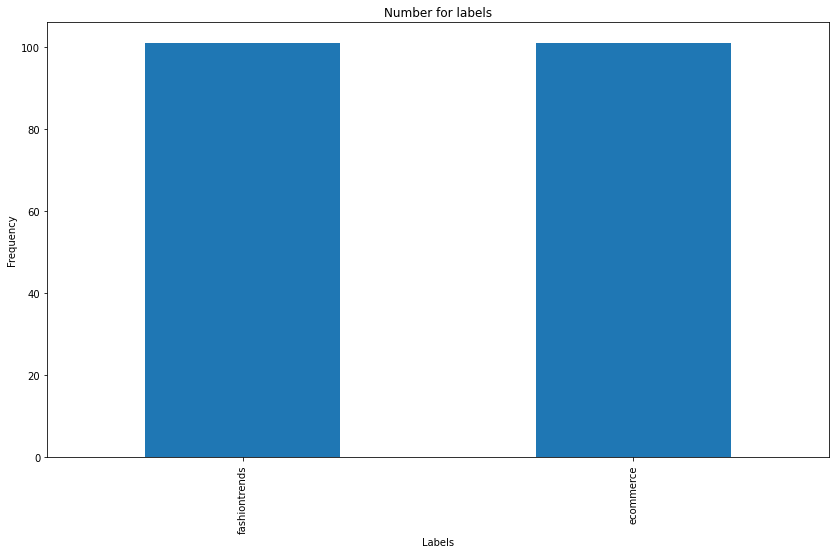

In [26]:
ax = df[label].value_counts().plot(kind=bar,
                                    figsize=(14,8),
                                    title="Number for labels")
ax.set_xlabel("Labels")
ax.set_ylabel("Frequency")

In [27]:
# Separate majority and minority classes

df_majority = df[df.label==fashiontrends]
df_minority = df[df.label==ecommerce]

In [28]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.label.value_counts()
# 1    49
# 0    49
# Name: balance, dtype: int64


fashiontrends    101
ecommerce        101
Name: label, dtype: int64

In [29]:
X=df_downsampled[final_tweets].values
y=df_downsampled[label].values


In [30]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
y


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

# Count Vectorizer

- Whenever we work on any NLP related problem, we process a lot of textual data. The textual data after processing needs to be fed into the model. Characters and words are incomprehensible to machines. So, when dealing with text data, we must represent it numerically so that the machine can understand it.
- The Count Vectorizer method converts text to numerical data. CountVectorizer tokenizes (tokenization means dividing the sentences in words) the text along with performing very basic preprocessing. It removes the punctuation marks and converts all the words to lowercase.
- CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample.
- Inside CountVectorizer, these words are not stored as strings. Rather, they are given a particular index value. This way of representation is known as a Sparse Matrix. In our dataset we are taking tweets and vectorizing the data so that it can fed into our Naive Bayes Models.

In [31]:
import random as rd
MyCV_content=CountVectorizer(input=content,
                        stop_words=english
                        #max_features=100
                        )

My_DTM2=MyCV_content.fit_transform(X)
ColNames=MyCV_content.get_feature_names()
My_DF_content=pd.DataFrame(My_DTM2.toarray(),columns=ColNames)


My_DF_content[LABEL] = pd.DataFrame(y,columns=[LABEL])
rd.seed(1993)
TrainDF, TestDF = train_test_split(My_DF_content, test_size=0.25)
TrainLabels=TrainDF["LABEL"]
TestLabels=TestDF["LABEL"]

TrainDF = TrainDF.drop(["LABEL"], axis=1)
TestDF = TestDF.drop(["LABEL"], axis=1)

from collections import Counter
Counter(y).keys()
Counter(y).values()

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


dict_values([101, 101])

# Naive Bayes Model

- Bayes Theorem: In probability theory and statistics, Bayes theorem (alternatively Bayes law or Bayes rule), named after Thomas Bayes, describes the probability of an event, based on prior knowledge of conditions that might be related to the event. For example, if the risk of developing health problems is known to increase with age, Bayes theorem allows the risk to an individual of a known age to be assessed more accurately (by conditioning it on their age) than simply assuming that the individual is typical of the population as a whole.
- Naive Bayes Algorithm is a classification technique based on Bayes Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.
- A fruit might be categorized as an apple, for instance, if it is red, rounded, and around 3 inches in diameter. Even if these characteristics depend on one another or on the presence of other characteristics, each of these traits separately increases the likelihood that this fruit is an apple, which is why it is called Naive.
- Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

# How does Bayes Theorem work?
- Lets take an example: A Path Lab is performing a Test of disease say D with two results Positive & Negative. They guarantee that their test result is 99% accurate: if you have the disease, they will give test positive 99% of the time. If you dont have the disease, they will test negative 99% of the time. If 3% of all the people have this disease and test gives positive result, what is the probability that you actually have the disease?
- For solving the above problem, we will have to use conditional probability.
Probability of people suffering from Disease D, P(D) = 0.03 = 3%
Probability that test gives positive result and patient have the disease, P(Pos | D) = 0.99 =99%
Probability of people not suffering from Disease D, P(~D) = 0.97 = 97%
Probability that test gives positive result and patient does have the disease, P(Pos | ~D) = 0.01 =1%
- For calculating the probability that the patient actually have the disease i.e, P( D | Pos) we will use Bayes theorem.
P(Pos) = P(D, pos) + P( ~D, pos) = P(pos|D)P(D) + P(pos|~D)P(~D) = 0.99 * 0.03 + 0.01 * 0.97 = 0.0394
Hence, P( D | Pos) = (P(Pos | D) * P(D)) / P(Pos) = (0.99 * 0.03) / 0.0394 = 0.753807107
So, Approximately 75% chances are there that the patient is actually suffering from disease.
This is how Bayes Theorem works. 

# Types of Naive Bayes Algorithms:
- Gaussian Naive Bayes Classifier: In Gaussian Naïve Bayes, continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution (Normal distribution). When plotted, it gives a bell-shaped curve which is symmetric about the mean of the feature values.
- Multinomial Naive Bayes Classifier: Feature vectors represent the frequencies with which certain events have been generated by a multinomial distribution. This is the event model typically used for document classification.
- Bernoulli Naive Bayes Classifier: In the multivariate Bernoulli event model, features are independent booleans (binary variables) describing inputs. Like the multinomial model, this model is popular for document classification tasks, where binary term occurrence (i.e. a word occurs in a document or not) features are used rather than term frequencies (i.e. frequency of a word in the document).

# Applications of Naive Bayes Algorithm:

- Real time Prediction: Naive Bayes is an eager learning classifier and it is sure fast. Thus, it could be used for making predictions in real time.
- Multi class Prediction: This algorithm is also well known for multi class prediction feature. Here we can predict the probability of multiple classes of target variable.
- Text classification/ Spam Filtering/ Sentiment Analysis: Naive Bayes classifiers mostly used in text classification (due to better result in multi class problems and independence rule) have higher success rate as compared to other algorithms. As a result, it is widely used in Spam filtering (identify spam e-mail) and Sentiment Analysis (in social media analysis, to identify positive and negative customer sentiments)
- Recommendation System: Naive Bayes Classifier and Collaborative Filtering together builds a Recommendation System that uses machine learning and data mining techniques to filter unseen information and predict whether a user would like a given resource or not

# Advantages:
- It is easy and fast to predict class of test data set. It also perform well in multi class prediction
- When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.
- It performs well in case of categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption).

# Disadvatages:
- If categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as Zero Frequency. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation.
- On the other side naive Bayes is also known as a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously.
- Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.

# Multinomial Naive Bayes Classifier

- There are thousands of softwares or tools for the analysis of numerical data but there are very few for texts. Multinomial Naive Bayes is one of the most popular supervised learning classifications that is used for the analysis of the categorical text data.
- Text data classification is gaining popularity because there is an enormous amount of information available in email, documents, websites, etc. that needs to be analyzed. Knowing the context around a certain type of text helps in finding the perception of a software or product to users who are going to use it.
- Multinomial Naive Bayes algorithm is a probabilistic learning method that is mostly used in Natural Language Processing (NLP). The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email or newspaper article. It calculates the probability of each tag for a given sample and then gives the tag with the highest probability as output.
- Naive Bayes classifier is a collection of many algorithms where all the algorithms share one common principle, and that is each feature being classified is not related to any other feature. The presence or absence of a feature does not affect the presence or absence of the other feature.
- Since we are dealing with text data (tweets) converted into numerical using Count Vectorizer, Multinomial Naive Bayes will be useful here.
- Laplace smoothing is a smoothing technique that handles the problem of zero probability in Naive Bayes. It is controlled by the parameter alpha in sklearns MultinomialNB. For this exercise we will take models with alpha as 1,3 and 0.

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.96      0.98        26

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



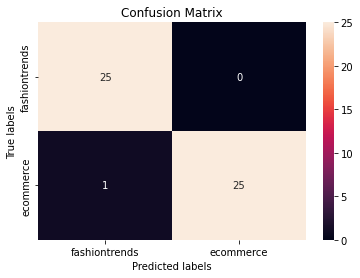

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix

MyModelNB= MultinomialNB(alpha = 1)

NB1=MyModelNB.fit(TrainDF, TrainLabels)
Preds = MyModelNB.predict(TestDF)
Pred_Proba = MyModelNB.predict_proba(TestDF)
print(metrics.classification_report(TestLabels, Preds))
cnf_matrix1 = confusion_matrix(TestLabels, Preds)

##Visualise Confusion Matrix
labels = [fashiontrends, ecommerce]
ax1=plt.subplot()
sns.heatmap(confusion_matrix(TestLabels, Preds), annot=True, fmt=g, ax=ax1);

# labels, title and ticks
ax1.set_xlabel(Predicted labels);ax1.set_ylabel(True labels); 
ax1.set_title(Confusion Matrix); 
ax1.xaxis.set_ticklabels(labels); ax1.yaxis.set_ticklabels(labels);
plt.show()
plt.close()

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.96      0.98        26

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



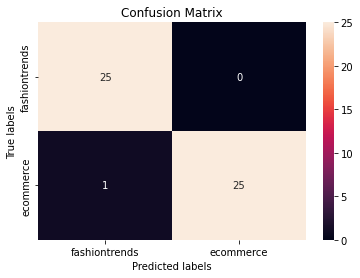

In [40]:
MyModelNB2= MultinomialNB(alpha =3)

NB2=MyModelNB2.fit(TrainDF, TrainLabels)
Preds2 = MyModelNB2.predict(TestDF)
Pred_Proba2 = MyModelNB2.predict_proba(TestDF)
print(metrics.classification_report(TestLabels, Preds2))
cnf_matrix1 = confusion_matrix(TestLabels, Preds2)

##Visualise Confusion Matrix
labels = [fashiontrends, ecommerce]
ax1=plt.subplot()
sns.heatmap(confusion_matrix(TestLabels, Preds2), annot=True, fmt=g, ax=ax1);

# labels, title and ticks
ax1.set_xlabel(Predicted labels);ax1.set_ylabel(True labels); 
ax1.set_title(Confusion Matrix); 
ax1.xaxis.set_ticklabels(labels); ax1.yaxis.set_ticklabels(labels);
plt.show()
plt.close()


              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.92      0.96        26

    accuracy                           0.96        51
   macro avg       0.96      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51



/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


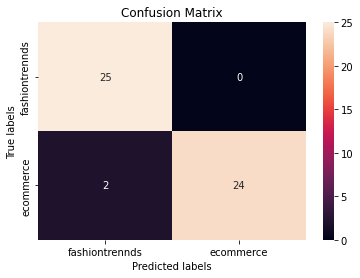

In [34]:
MyModelNB3= MultinomialNB(alpha =0)

NB3=MyModelNB3.fit(TrainDF, TrainLabels)
Preds3 = MyModelNB3.predict(TestDF)
Pred_Proba3 = MyModelNB3.predict_proba(TestDF)
print(metrics.classification_report(TestLabels, Preds3))
cnf_matrix1 = confusion_matrix(TestLabels, Preds3)

##Visualise Confusion Matrix
labels = [fashiontrennds, ecommerce]
ax1=plt.subplot()
sns.heatmap(confusion_matrix(TestLabels, Preds3), annot=True, fmt=g, ax=ax1);

# labels, title and ticks
ax1.set_xlabel(Predicted labels);ax1.set_ylabel(True labels); 
ax1.set_title(Confusion Matrix); 
ax1.xaxis.set_ticklabels(labels); ax1.yaxis.set_ticklabels(labels);
plt.show()
plt.close()

In [35]:
class_0_prob_sorted = NB1.feature_log_prob_[0, :].argsort()[::-1]
class_1_prob_sorted = NB1.feature_log_prob_[1, :].argsort()[::-1]

print(np.take(MyCV_content.get_feature_names(), class_0_prob_sorted[:10]))
word_cloud_0 = Counter(np.take(MyCV_content.get_feature_names(), class_0_prob_sorted[:20]))
print(np.take(MyCV_content.get_feature_names(), class_1_prob_sorted[:10])) 
word_cloud_1 = Counter(np.take(MyCV_content.get_feature_names(), class_1_prob_sorted[:20]))


['ecommerce' 'business' 'amazon' 'seller' 'addtocart' 'shopify'
 'marketing' 'trending' 'logo' 'retail']
['fashiontrends' 'fashion' 'fashionblogger' 'fashionstyle' 'woman'
 'accessory' 'fashiondesigner' 'clothing' 'fashionaddict' 'holla']


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


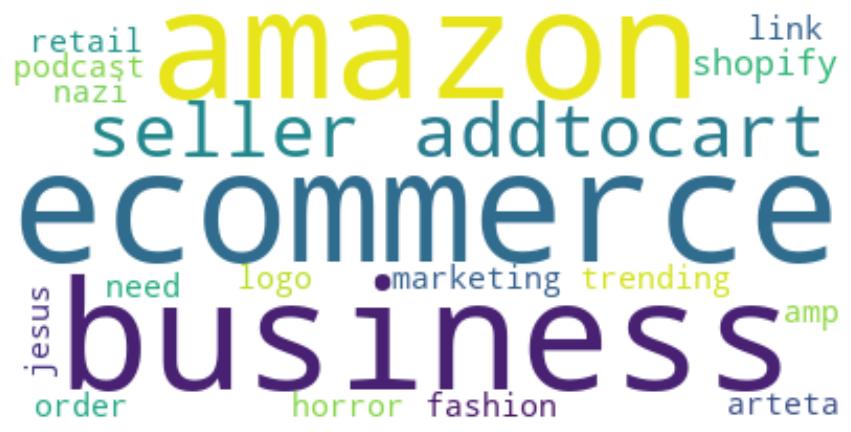

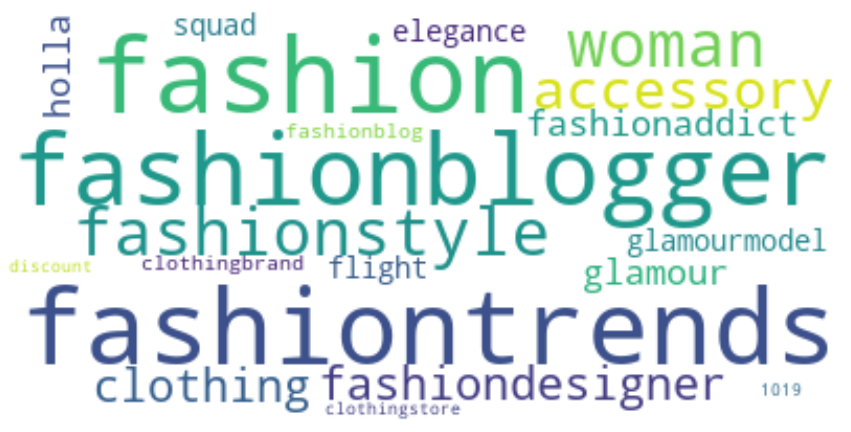

In [36]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(background_color=white).fit_words(word_cloud_0)

fig, ax = plt.subplots(figsize=(15,15))
_ = ax.imshow(wordcloud, interpolation=bilinear)
_ = ax.axis("off")




wordcloud = WordCloud(background_color=white).fit_words(word_cloud_1)

fig, ax = plt.subplots(figsize=(15,15))
_ = ax.imshow(wordcloud, interpolation=bilinear)
_ = ax.axis("off")